<a href="https://colab.research.google.com/github/sofialuthier/Human_Detection/blob/main/yolov8Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Aug 21 12:09:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.134

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 299MB/s]
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

100% 104k/104k [00:00<00:00, 76.4MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 91.4ms
Speed: 14.9ms preprocess, 91.4ms inference, 291.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vJLpl6yyrRhvRUHqu2CY")
project = rf.workspace("burdur-mehmet-akif-ersoy-university").project("silahegitimi")
dataset = project.version(1).download("yolov8")




/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=baae34879836b334097fc55f7cebc17023dd3a3acfb5534da2e2f91cbc381110
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pypar

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to silahEğitimi-1 in yolov8:: 100%|██████████| 238/238 [00:00<00:00, 1626.89it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=5 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:02<00:00, 10.7MB/s]
New https://pypi.org/project/ultralytics/8.0.158 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/silahEğitimi-1/data.yaml, epochs=5, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   R_curve.png
confusion_matrix_normalized.png			   results.csv
confusion_matrix.png				   results.png
events.out.tfevents.1692619916.1e12f45aa56c.914.0  train_batch0.jpg
F1_curve.png					   train_batch1.jpg
labels_correlogram.jpg				   train_batch2.jpg
labels.jpg					   val_batch0_labels.jpg
P_curve.png					   val_batch0_pred.jpg
PR_curve.png					   weights


/content


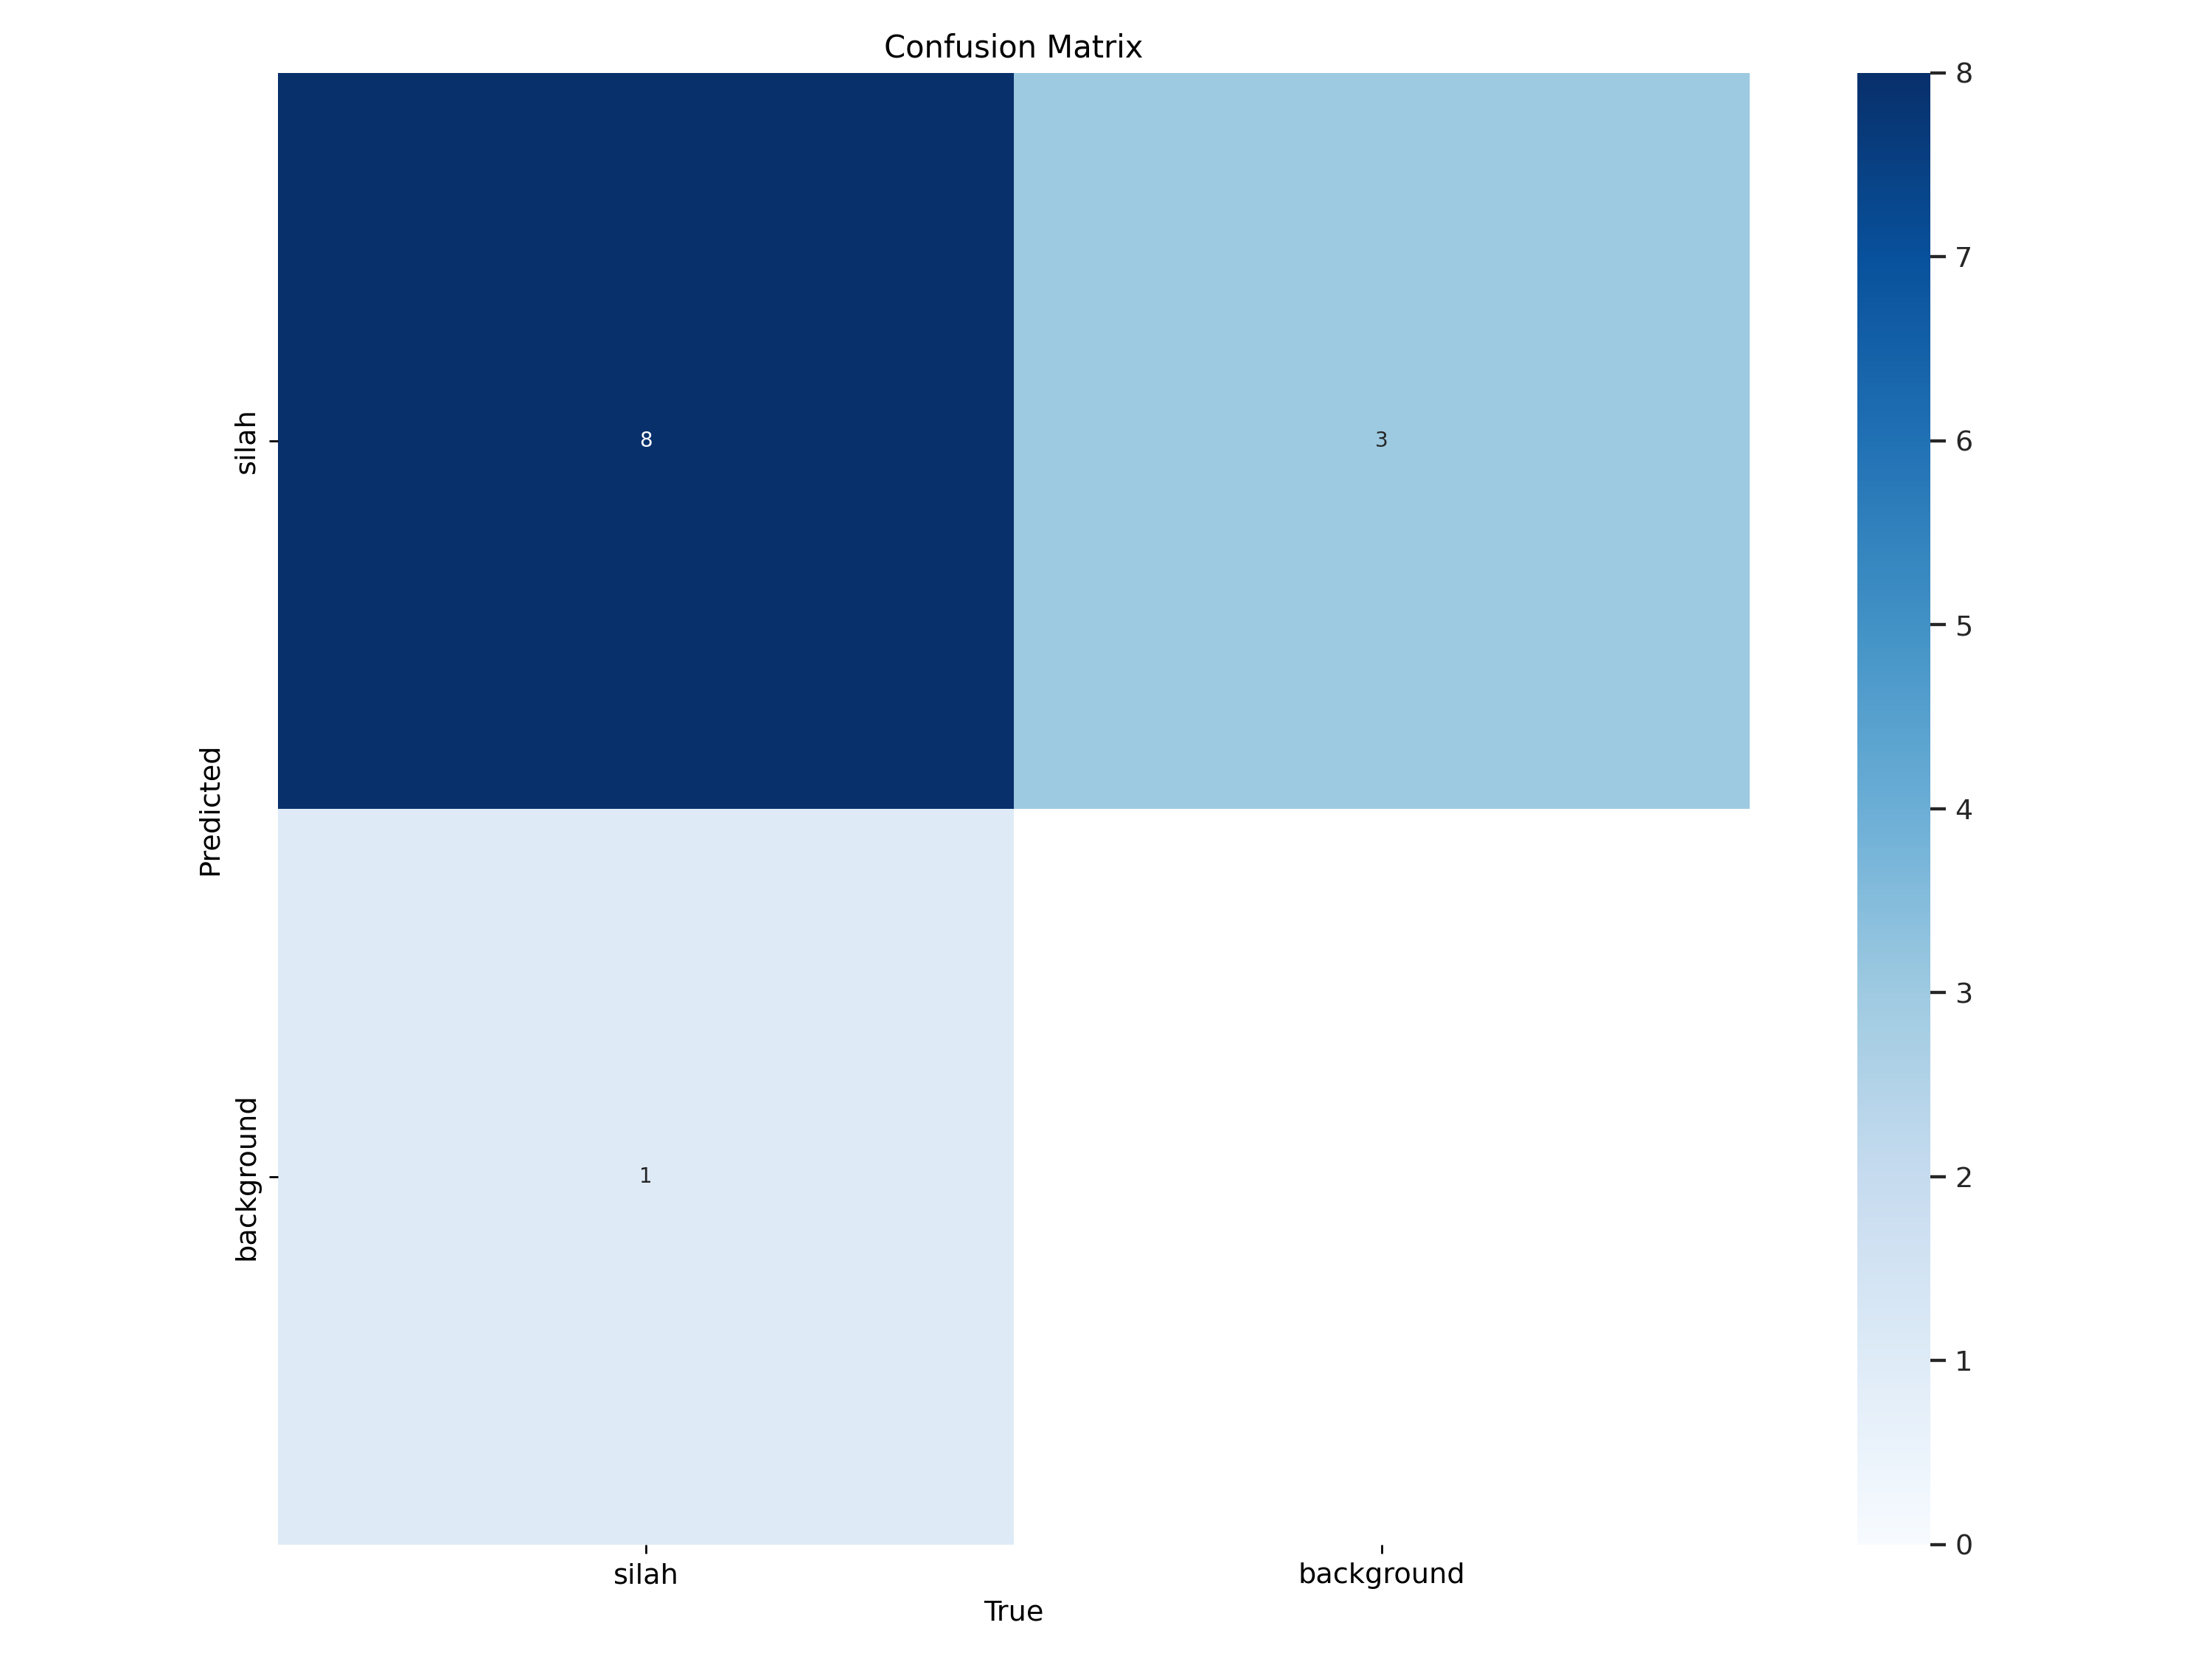

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


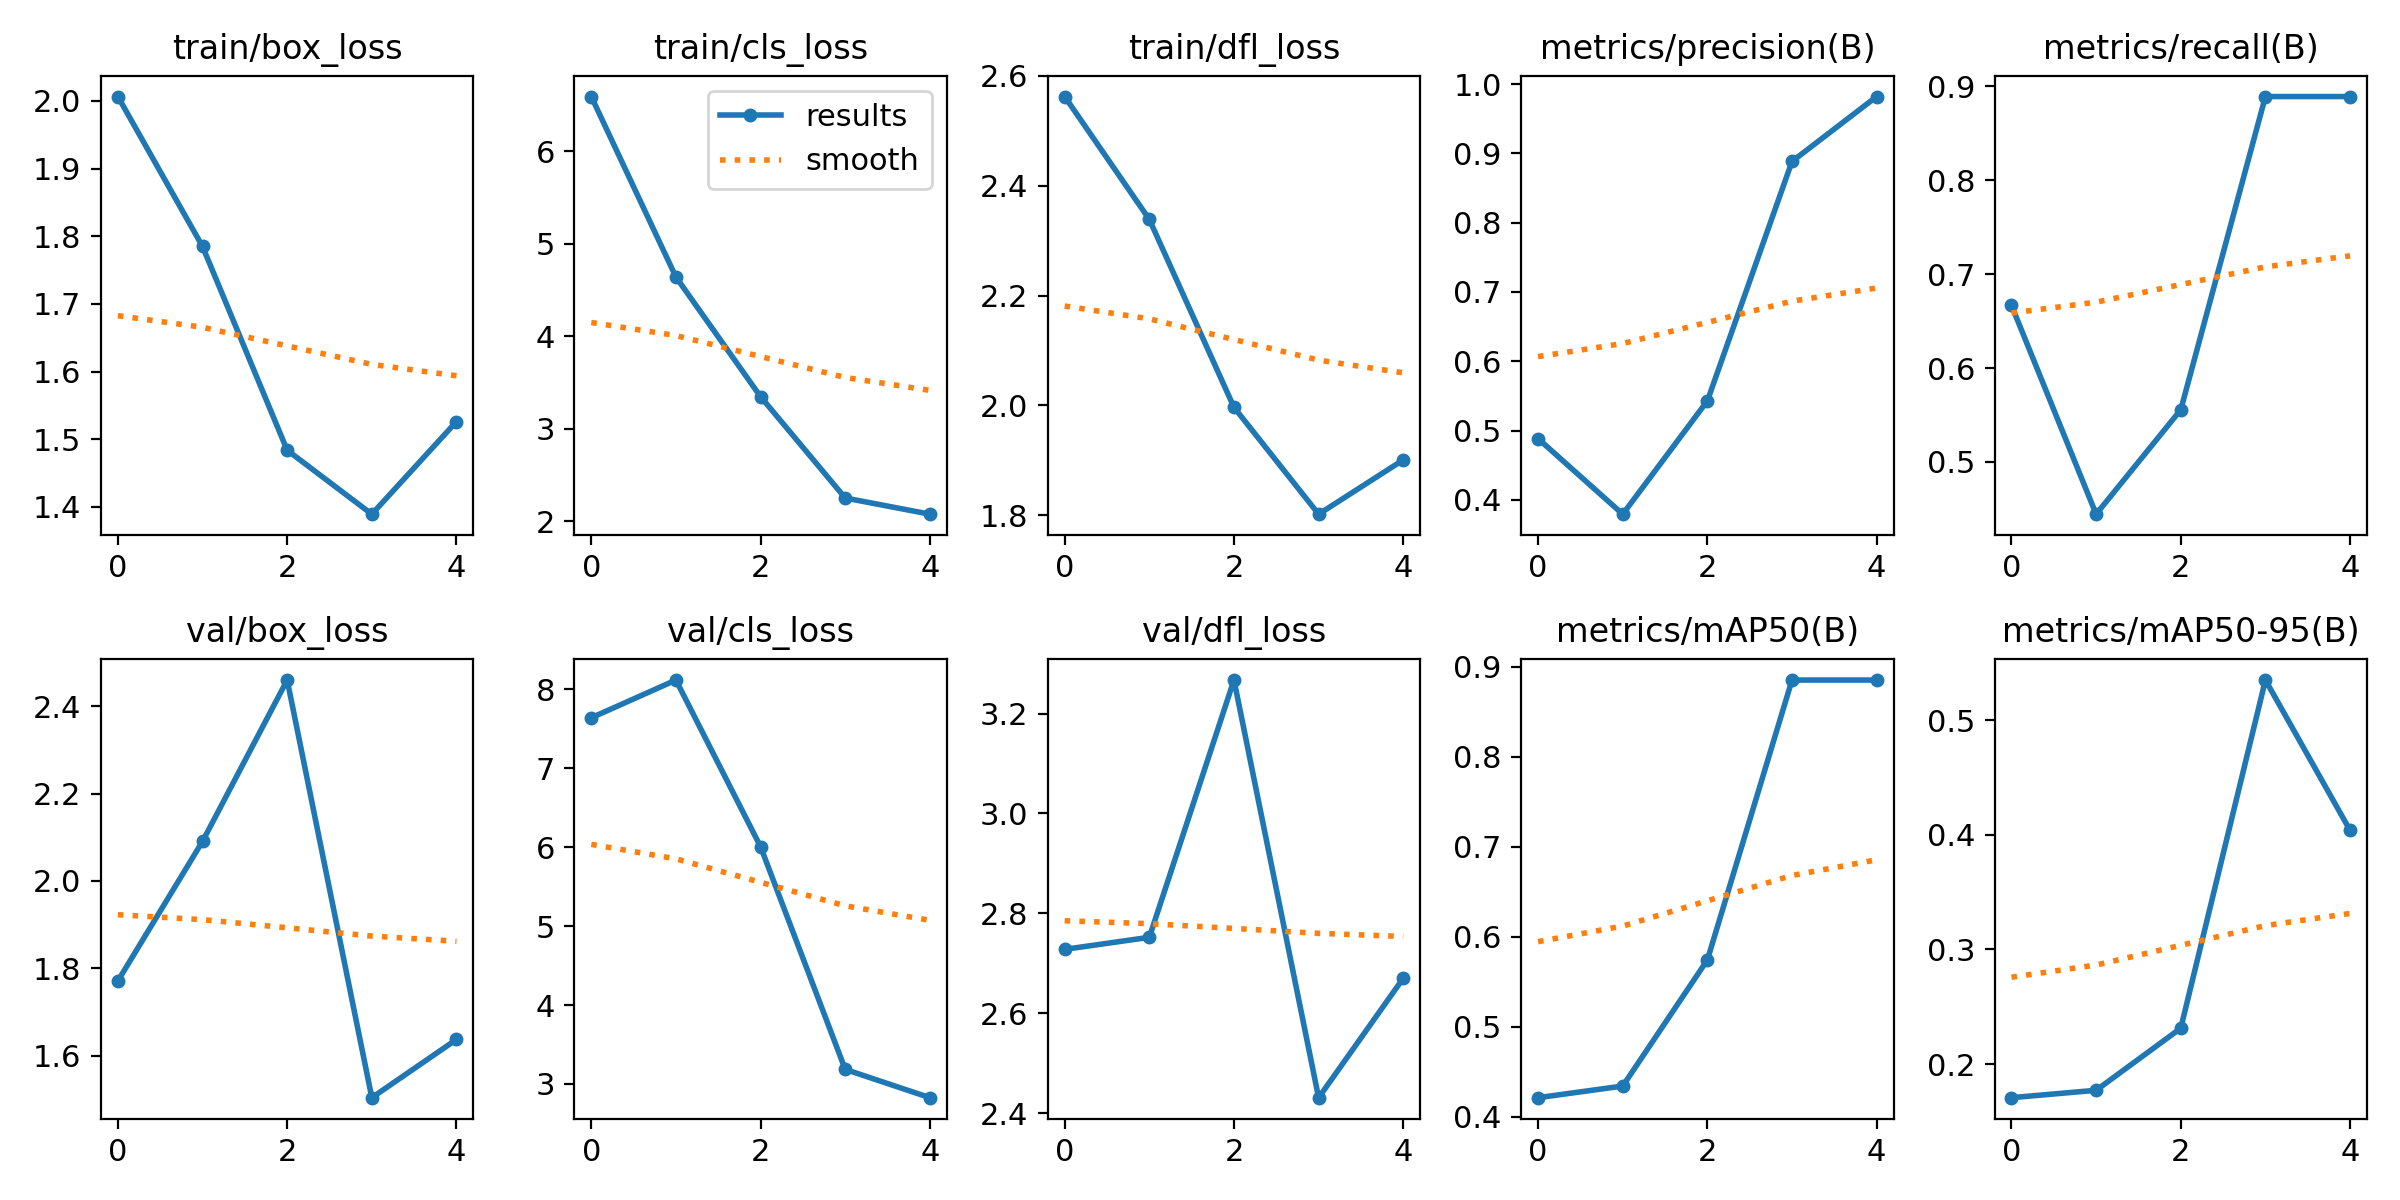

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


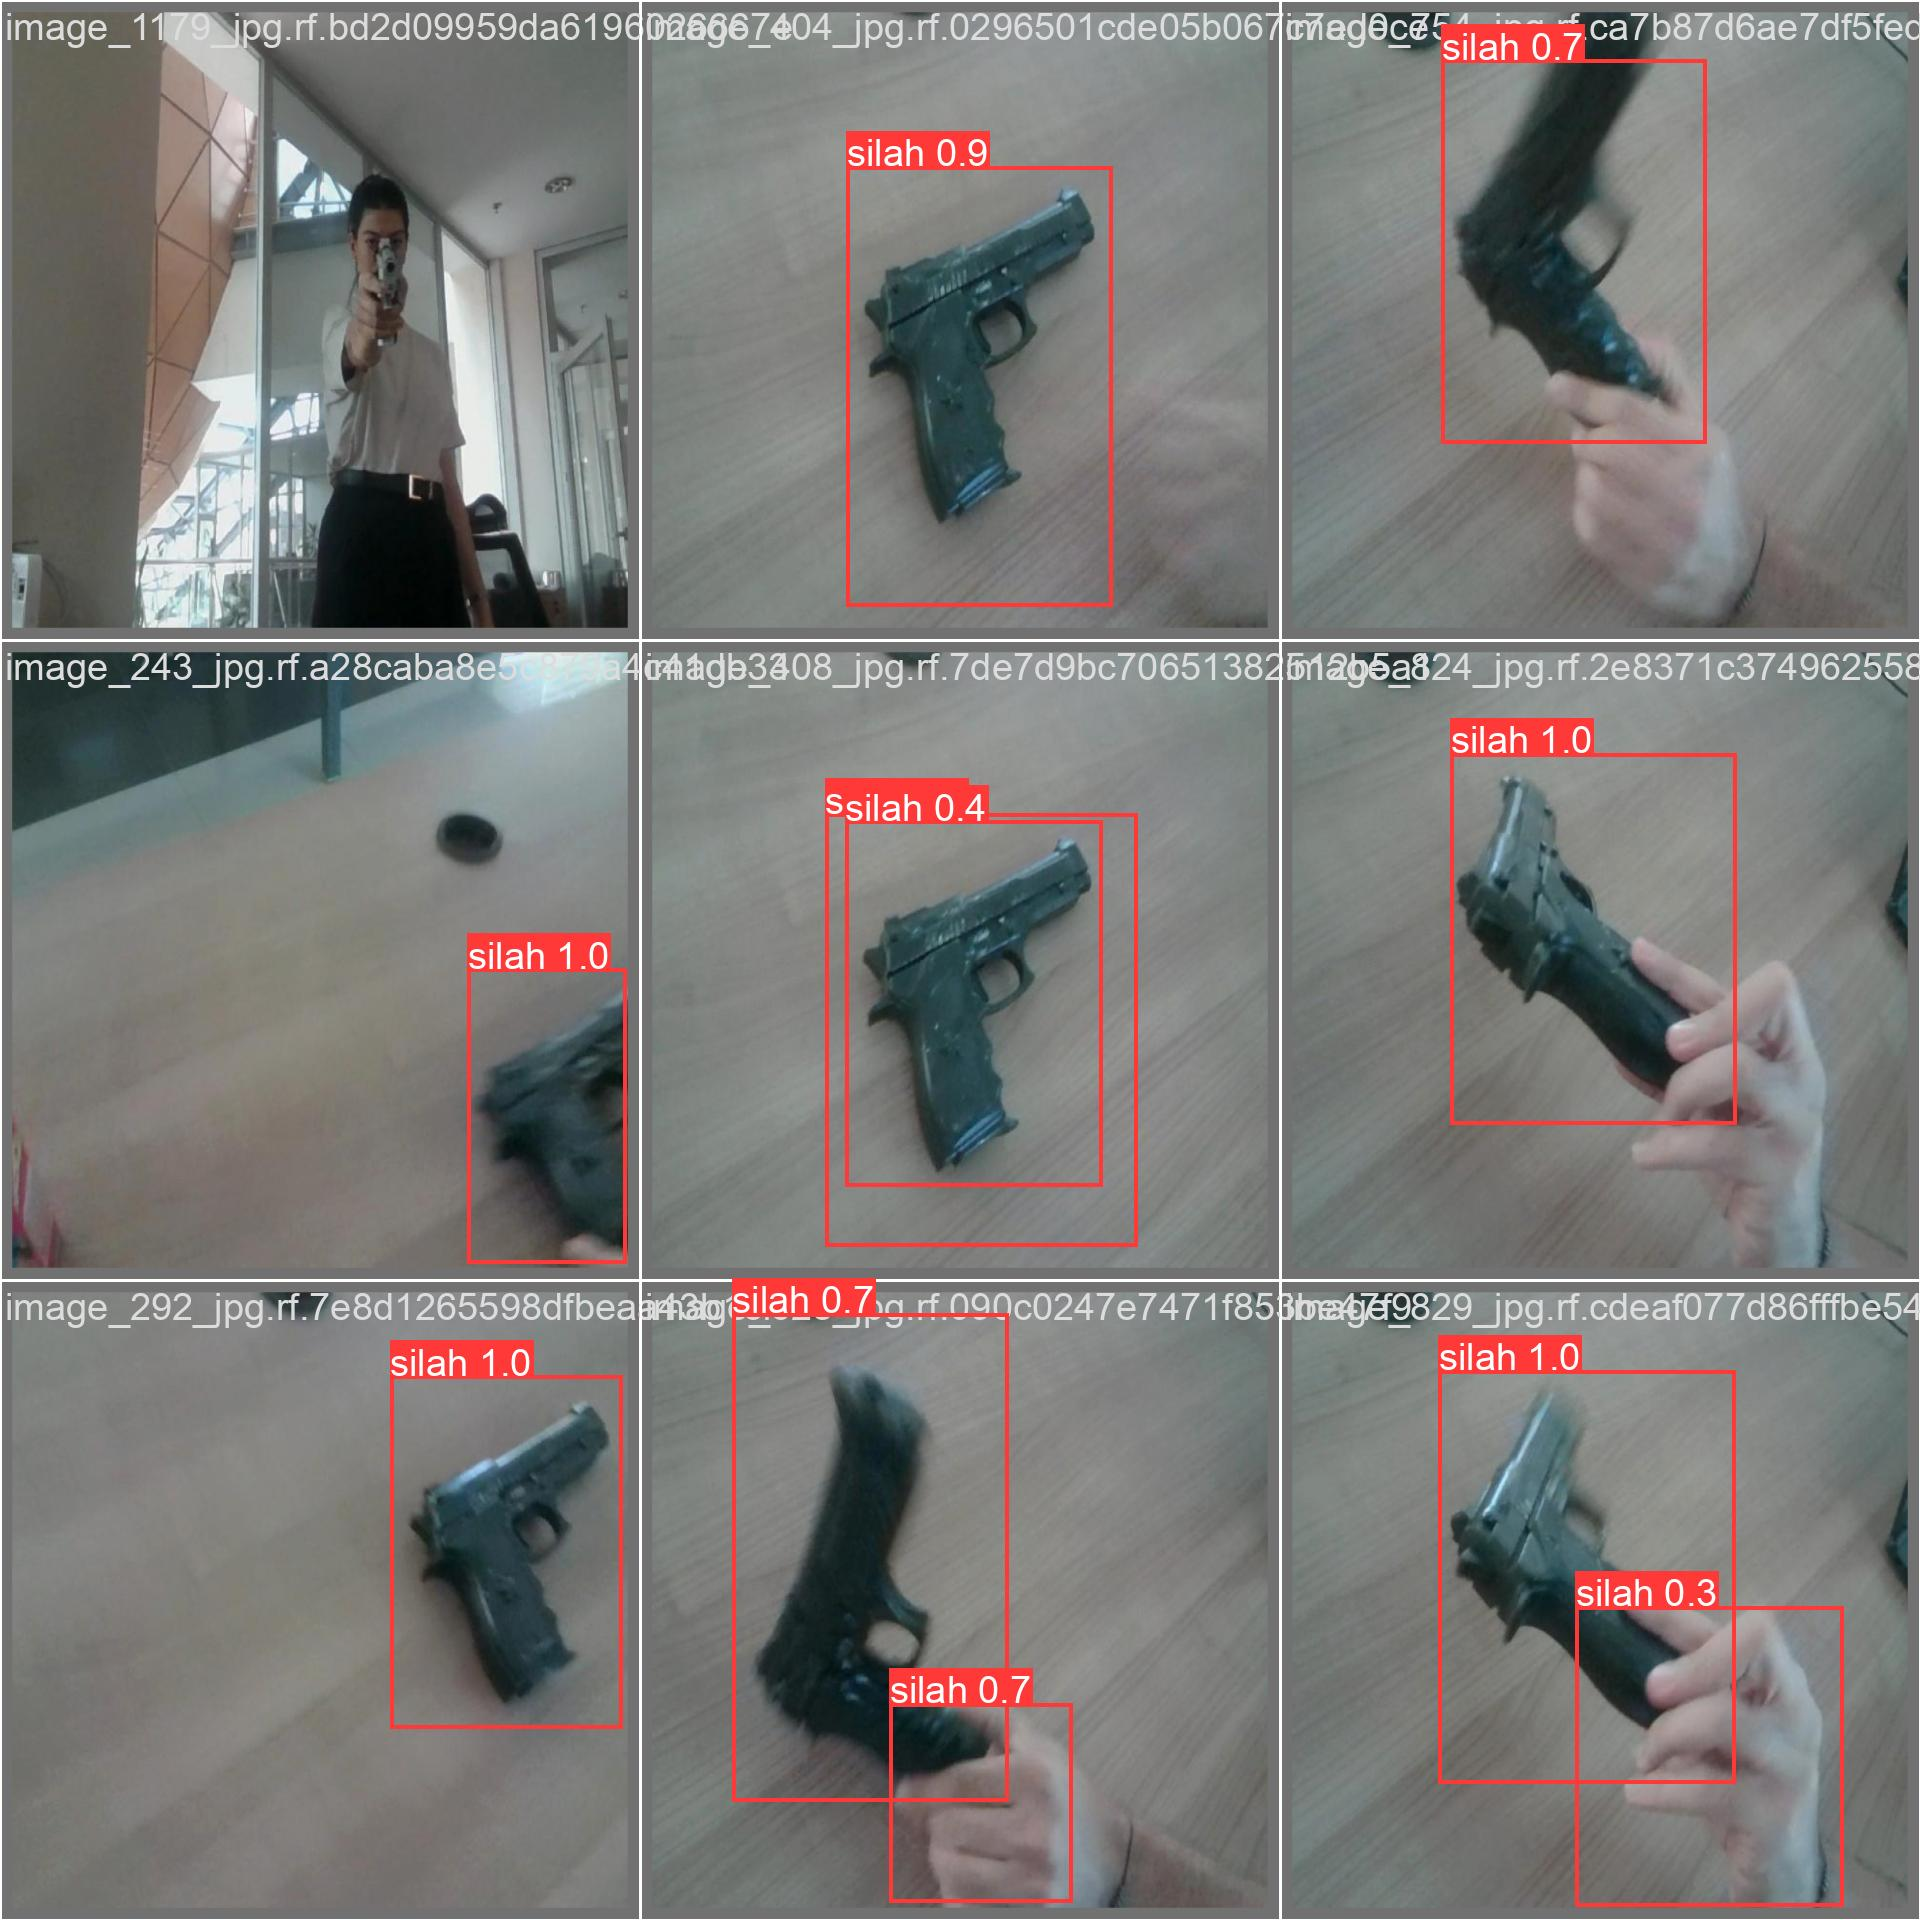

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/datasets/silahEğitimi-1/valid/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100% 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.27it/s]
                   all          9          9      0.888      0.889      0.885      0.535
Speed: 0.3ms preprocess, 24.5ms inference, 0.0ms loss, 11.4ms postprocess per image
Results saved to runs/detect/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/5 /content/datasets/silahEğitimi-1/test/images/image_1219_jpg.rf.85c995d0801af58cb967de23a97498bc.jpg: 800x800 2 silahs, 24.6ms
image 2/5 /content/datasets/silahEğitimi-1/test/images/image_1329_jpg.rf.de9ce10d033dfdfe0e64db1deac1279e.jpg: 800x800 2 silahs, 24.6ms
image 3/5 /content/datasets/silahEğitimi-1/test/images/image_223_jpg.rf.a9c70e0acc04c81c154d29ff973d7c6d.jpg: 800x800 1 silah, 24.6ms
image 4/5 /content/datasets/silahEğitimi-1/test/images/image_717_jpg.rf.f6445312b02325768770d5f16f722ed6.jpg: 800x800 3 silahs, 24.6ms
image 5/5 /content/datasets/silahEğitimi-1/test/images/image_842_jpg.rf.c65c20bd911fbedda511ea514b53a27e.jpg: 800x800 2 silahs, 24.6ms
Speed: 4.1ms preprocess, 24.6ms inference, 24.3ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/5 /content/datasets/silahEğitimi-1/test/images/image_1219_jpg.rf.85c995d0801af58cb967de23a97498bc.jpg: 800x800 2 silahs, 24.6ms
image 2/5 /content/datasets/silahEğitimi-1/test/images/image_1329_jpg.rf.de9ce10d033dfdfe0e64db1deac1279e.jpg: 800x800 2 silahs, 24.6ms
image 3/5 /content/datasets/silahEğitimi-1/test/images/image_223_jpg.rf.a9c70e0acc04c81c154d29ff973d7c6d.jpg: 800x800 1 silah, 24.6ms
image 4/5 /content/datasets/silahEğitimi-1/test/images/image_717_jpg.rf.f6445312b02325768770d5f16f722ed6.jpg: 800x800 3 silahs, 24.6ms
image 5/5 /content/datasets/silahEğitimi-1/test/images/image_842_jpg.rf.c65c20bd911fbedda511ea514b53a27e.jpg: 800x800 2 silahs, 23.9ms
Speed: 4.1ms preprocess, 24.5ms inference, 23.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict3


In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/content/runs/detect/predict/tehlikeliDurum.mp4')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from IPython.display import display, Image
import cv2

#video_path = '/content/runs/detect/predict/tehlikeliDurum.mp4'
cap = cv2.VideoCapture(0)
font=cv2.FONT_HERSHEY_SIMPLEX
silah=cv2.CascadeClassifier('silah2.xml')


while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Görüntüyü modelin girdi formatına dönüştür
    # ve tahminleri al
    predictions = model.predict(frame)

     # Tahminleri görüntü üzerine çiz ve göster
    for prediction in predictions:
        x, y, width, height, class_label, confidence = prediction
        cv2.rectangle(frame, (x, y), (x + width, y + height), (0, 255, 0), 2)
        cv2.putText(frame, f'{class_label}: {confidence:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)







    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #scale = silah.detectMultiScale(gray, scaleFactor=1.01, minNeighbors=3, minSize=(30, 30))

    #for (x, y, w, h) in scale:
     # pt1 = (x, y)
      #pt2 = (x + w, y + h)

     # cv2.rectangle(frame, pt1, pt2, (255, 0, 0), 2)
      #cv2.rectangle(frame, (x, y), (x + 100, y + 40), (255, 0, 0), -1)
      #cv2.putText(frame, "silah", (x + 10, y + 30), font, 0.7, (255, 255, 255), 2)

    # Görüntüyü ekranda gösterin (döngü içine değil)
    #cv2.imshow('Video', frame)

    # Frame'i byte formatına dönüştür
   # _, img_encoded = cv2.imencode('.jpg', frame)

    # Görüntüyü IPython.display ile göster
    #display(Image(data=img_encoded))

    display(Image(data=cv2.imencode('.jpg', frame)[1].tobytes()))


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()

